### Import Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statistics as st 

### Load Data

In [2]:
df = pd.read_csv('./amazon_cust.csv')
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [3]:
df.shape

(602, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [5]:
df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [9]:
df.drop(['Timestamp'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 601
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   age                                     600 non-null    int64 
 1   Gender                                  600 non-null    object
 2   Purchase_Frequency                      600 non-null    object
 3   Purchase_Categories                     600 non-null    object
 4   Personalized_Recommendation_Frequency   600 non-null    object
 5   Browsing_Frequency                      600 non-null    object
 6   Product_Search_Method                   600 non-null    object
 7   Search_Result_Exploration               600 non-null    object
 8   Customer_Reviews_Importance             600 non-null    int64 
 9   Add_to_Cart_Browsing                    600 non-null    object
 10  Cart_Completion_Frequency               600 non-null    object
 11  Cart_Abando

(array([  1.,   3.,  71., 252., 100.,  69.,  66.,  18.,  15.,   5.]),
 array([ 3. ,  9.4, 15.8, 22.2, 28.6, 35. , 41.4, 47.8, 54.2, 60.6, 67. ]),
 <BarContainer object of 10 artists>)

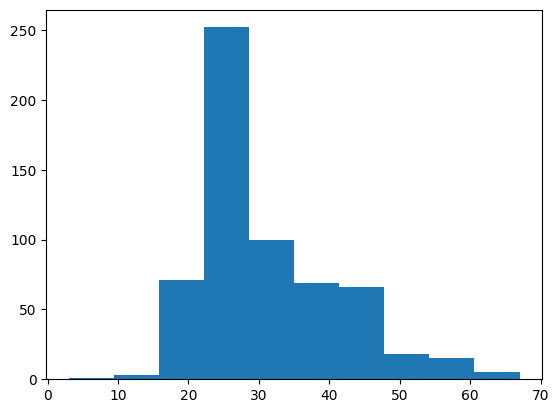

In [16]:
plt.hist(data=df, x='age')

<Axes: xlabel='Cart_Abandonment_Factors', ylabel='count'>

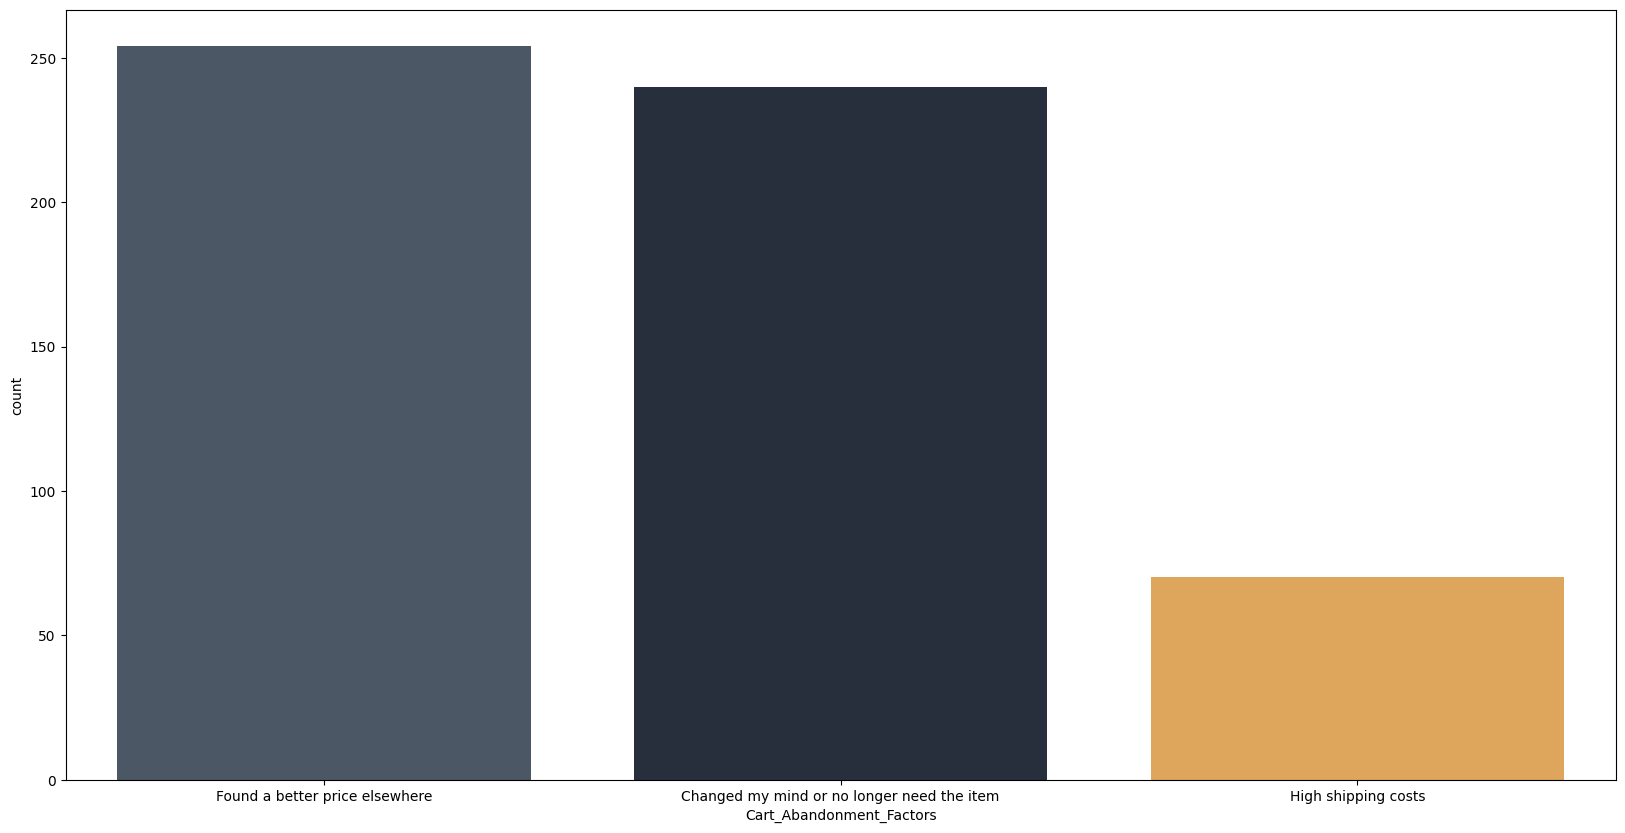

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x='Cart_Abandonment_Factors', order = df['Cart_Abandonment_Factors'].value_counts().index[0:-1],palette =['#485769','#232f3e','#f3a847'],data = df)